In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #подключение библиотек

url = 'https://github.com/mirea-aie-2025/aie-course-meta/blob/main/seminars/S02/S02-hw-dataset.csv'
raw_url = 'https://raw.githubusercontent.com/mirea-aie-2025/aie-course-meta/main/seminars/S02/S02-hw-dataset.csv' #преобразование raw-ссылки для CSV

df = pd.read_csv(raw_url)
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [28]:
#2.3.1
df.head(n=6) #вывод первых 6 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785


In [3]:
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов \n")

df.info() #информация о типах данных


Размер датасета: 41 строк, 5 столбцов 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
display(df.describe()) #базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [53]:
missing_data = df.isna().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percentage
})

print("\n1. Пропущенные значения по столбцам:")
print(missing_summary[missing_summary['Пропусков'] > 0])

duplicates = df.duplicated().sum()
print(f"\n2. Полностью дублирующих строк: {duplicates}")

if duplicates > 0:
    print("Первые 5 дубликатов:")
    print(df[df.duplicated()].head())


1. Пропущенные значения по столбцам:
           Пропусков    Процент
age                2   4.878049
age_group         27  65.853659

2. Полностью дублирующих строк: 1
Первые 5 дубликатов:
    user_id   age country  purchases  revenue age_group
40       10  24.0      RU          7      511     22-25


In [31]:
def print_problem_rows(df, condition, message):
    """Выводит строки, удовлетворяющие условию, в табличном формате"""
    problem_df = df[condition]
    if len(problem_df) > 0:
        print(f"\n{message} ({len(problem_df)} строк):")
        print(problem_df[['user_id', 'age', 'country', 'purchases', 'revenue']].to_string())
    return problem_df

# Использование:
print_problem_rows(df, df['purchases'] < 0, "Отрицательные purchases")
print_problem_rows(df, ~df['age'].between(10, 100), "Нереалистичный возраст")

#были обнаружены данные с проблемами в виде нереалистичного возраста, а также его отсутсвия + были выведы строчки с отрицательныыми значениями purchases


Отрицательные purchases (1 строк):
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785

Нереалистичный возраст (4 строк):
    user_id    age country  purchases  revenue
4         5    NaN      DE          6     1296
5         6  120.0      FR         -1      785
12       13    NaN      US          9      630
20       21    5.0      RU          8     1488


,user_id,age,country,purchases,revenue
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
12,13,NaN,US,9,630
20,21,5.0,RU,8,1488



Частоты для 'country':


,count
country,
RU,13
FR,12
US,8
DE,6
CN,2


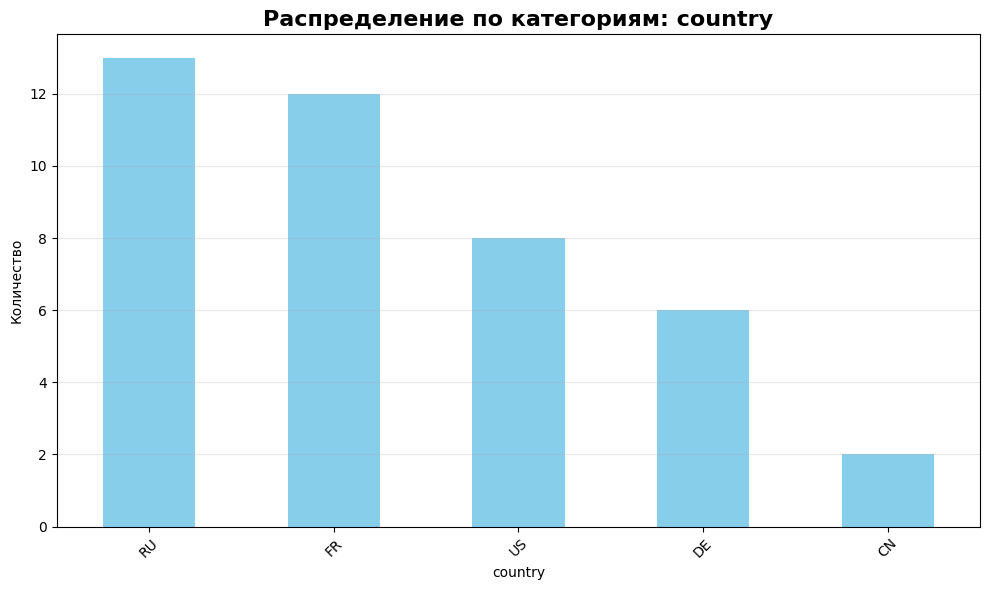

In [40]:
#2.3.3
#частоты для категориальных переменных
categorical_cols = df.select_dtypes(include=['object']).columns
for i, col in enumerate(categorical_cols[:2]):  # Первые две категориальные переменные
    print(f"\nЧастоты для '{col}':")
    freq_table = df[col].value_counts()
    display(freq_table)

    # Визуализация
    plt.figure(figsize=(10, 6))
    freq_table.plot(kind='bar', color='skyblue')
    plt.title(f'Распределение по категориям: {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [43]:
#группировка по курсу
if 'course' in df.columns and 'final_score' in df.columns:
    print("Средняя и суммарная оценка по курсам:")
    course_stats = df.groupby('course').agg({
        'final_score': ['mean', 'median', 'std', 'count'],
        'hours_studied': 'mean',
        'attendance': 'mean'
    }).round(2)

    display(course_stats)

    #визуализация средних оценок по курсам
    plt.figure(figsize=(12, 6))
    course_stats[('final_score', 'mean')].sort_values(ascending=False).plot(
        kind='bar', color='lightgreen'
    )
    plt.title('Средняя итоговая оценка по курсам', fontsize=16, fontweight='bold')
    plt.xlabel('Курс')
    plt.ylabel('Средняя оценка')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

#группировка по полу
if 'gender' in df.columns and 'final_score' in df.columns:
    print("\n📊 Статистика по гендерным группам:")
    gender_stats = df.groupby('gender').agg({
        'final_score': ['mean', 'median', 'std', 'count'],
        'hours_studied': 'mean',
        'age': 'mean'
    }).round(2)

    display(gender_stats)


In [54]:

# Создание возрастных групп
age_bins = [15, 18, 21, 25, 30]
age_labels = ['15-18', '19-21', '22-25', '26-30']

df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

print("Распределение по возрастным группам:")
age_group_counts = df['age_group'].value_counts().sort_index()
display(age_group_counts)

# Статистика по возрастным группам
if 'final_score' in df.columns:
    age_group_stats = df.groupby('age_group').agg({
        'final_score': 'mean',
        'hours_studied': 'mean',
        'attendance': 'mean'
    }).round(2)

    print("\nСтатистика по возрастным группам:")
    display(age_group_stats)

Распределение по возрастным группам:


,count
age_group,
15-18,0
19-21,2
22-25,8
26-30,4


In [57]:
# Создание папки для сохранения графиков
import os
os.makedirs('homeworks/hw02/figures', exist_ok=True)

plt.figure(figsize=(12, 7))

n_bins = int(np.ceil(np.log2(len(df))) + 1) if 'final_score' in df.columns else 20

if 'final_score' in df.columns:
    plt.hist(df['final_score'].dropna(), bins=n_bins,
             color='steelblue', edgecolor='black', alpha=0.7)
    plt.title('Распределение итоговых оценок студентов', fontsize=16, fontweight='bold')
    plt.xlabel('Итоговая оценка', fontsize=14)
    plt.ylabel('Количество студентов', fontsize=14)
    plt.grid(axis='y', alpha=0.3)

    # Добавляем среднюю линию
    mean_score = df['final_score'].mean()
    plt.axvline(mean_score, color='red', linestyle='--', linewidth=2,
                label=f'Среднее: {mean_score:.1f}')

    # Добавляем медиану
    median_score = df['final_score'].median()
    plt.axvline(median_score, color='green', linestyle='--', linewidth=2,
                label=f'Медиана: {median_score:.1f}')

    plt.legend()
    plt.tight_layout()

    # Сохранение графика
    plt.savefig('homeworks/hw02/figures/histogram_final_score.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("Гистограмма сохранена в 'homeworks/hw02/figures/histogram_final_score.png'")

<Figure size 1200x700 with 0 Axes>

In [60]:
plt.figure(figsize=(14, 8))

if all(col in df.columns for col in ['final_score', 'course']):
    # Подготовка данных для боксплота
    courses = df['course'].dropna().unique()
    data_to_plot = [df[df['course'] == course]['final_score'].dropna() for course in courses]

    # Создание боксплота
    box = plt.boxplot(data_to_plot, labels=courses, patch_artist=True,
                      medianprops=dict(color='black', linewidth=2),
                      whiskerprops=dict(color='gray', linewidth=1.5),
                      capprops=dict(color='gray', linewidth=1.5))

    # Раскрашиваем боксы
    colors = plt.cm.Set3(np.linspace(0, 1, len(courses)))
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.title('Распределение итоговых оценок по курсам', fontsize=16, fontweight='bold')
    plt.xlabel('Курс', fontsize=14)
    plt.ylabel('Итоговая оценка', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()

    # Сохранение графика
    plt.savefig('homeworks/hw02/figures/boxplot_by_course.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Боксплот сохранен в 'homeworks/hw02/figures/boxplot_by_course.png'")

# #### 3. Диаграмма рассеяния (scatter plot)

# %%
# Диаграмма рассеяния: время учебы vs итоговая оценка
plt.figure(figsize=(12, 8))

if all(col in df.columns for col in ['hours_studied', 'final_score']):
    # Очищаем данные от пропусков и выбросов для scatter plot
    scatter_data = df[['hours_studied', 'final_score']].dropna()
    scatter_data = scatter_data[(scatter_data['final_score'] >= 0) & (scatter_data['final_score'] <= 100)]

    # Разные цвета для разных курсов, если есть
    if 'course' in df.columns:
        courses = df['course'].dropna().unique()
        colors = plt.cm.tab10(np.linspace(0, 1, len(courses)))
        color_map = {course: color for course, color in zip(courses, colors)}

        for course in courses:
            course_data = df[df['course'] == course]
            plt.scatter(course_data['hours_studied'], course_data['final_score'],
                       alpha=0.6, s=80, label=course, color=color_map[course], edgecolors='w', linewidth=0.5)
        plt.legend(title='Курс', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.scatter(scatter_data['hours_studied'], scatter_data['final_score'],
                   alpha=0.6, s=80, color='coral', edgecolors='w', linewidth=0.5)

    plt.title('Зависимость итоговой оценки от времени учебы', fontsize=16, fontweight='bold')
    plt.xlabel('Часы учебы в неделю', fontsize=14)
    plt.ylabel('Итоговая оценка', fontsize=14)

    # Добавляем линию регрессии
    if len(scatter_data) > 1:
        z = np.polyfit(scatter_data['hours_studied'], scatter_data['final_score'], 1)
        p = np.poly1d(z)
        plt.plot(scatter_data['hours_studied'], p(scatter_data['hours_studied']),
                "r--", linewidth=2, alpha=0.8, label=f'Тренд: y={z[0]:.2f}x+{z[1]:.2f}')
        plt.legend()

    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Сохранение графика
    plt.savefig('homeworks/hw02/figures/scatter_study_vs_score.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Scatter plot сохранен в 'homeworks/hw02/figures/scatter_study_vs_score.png'")

<Figure size 1400x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>